In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import table
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import scipy.stats as stats
from matplotlib.colors import LinearSegmentedColormap
from datetime import datetime
import matplotlib.dates as mdates

LEITURA DA BASE DE DADOS

In [2]:
df_geral = pd.read_csv("clear-data/dados_tratados.csv")

In [3]:
df_geral.head()

,ride_name,data_hora,wait_time,date,time,day_of_the_week,sale,holiday,holiday_season,season,...,HotWheels 1730,Acqua 1400,Acqua 1500,Madagascar 1500,Madagascar 1600,Madagascar 1700,Sonho 1800,Excalibur 1200,Excalibur 1430,Excalibur 1700
0,Autopista (bate-bate),2023-01-01 11:25:03,30,2023-01-01,11:25:03,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Autopista (bate-bate),2023-01-01 11:30:04,30,2023-01-01,11:30:04,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Autopista (bate-bate),2023-01-01 11:35:03,30,2023-01-01,11:35:03,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Autopista (bate-bate),2023-01-01 11:40:03,30,2023-01-01,11:40:03,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Autopista (bate-bate),2023-01-01 11:45:04,30,2023-01-01,11:45:04,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_geral['data_hora'] = pd.to_datetime(df_geral['data_hora'])
df_geral['date'] = df_geral['data_hora'].dt.date

In [5]:
df_geral.head()

,ride_name,data_hora,wait_time,date,time,day_of_the_week,sale,holiday,holiday_season,season,...,HotWheels 1730,Acqua 1400,Acqua 1500,Madagascar 1500,Madagascar 1600,Madagascar 1700,Sonho 1800,Excalibur 1200,Excalibur 1430,Excalibur 1700
0,Autopista (bate-bate),2023-01-01 11:25:03,30,2023-01-01,11:25:03,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Autopista (bate-bate),2023-01-01 11:30:04,30,2023-01-01,11:30:04,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Autopista (bate-bate),2023-01-01 11:35:03,30,2023-01-01,11:35:03,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Autopista (bate-bate),2023-01-01 11:40:03,30,2023-01-01,11:40:03,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Autopista (bate-bate),2023-01-01 11:45:04,30,2023-01-01,11:45:04,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
tabela_horarios = pd.read_excel("bcw-operation-calendar.xlsx")
tabela_horarios["date"] = pd.to_datetime(tabela_horarios["date"])

FILTRAGEM DAS ATRAÇÕES

In [7]:
lista_atracoes = [
    'Autopista (bate-bate)', 'Baby Elefante', 'Barco Pirata',
    'Betinho Carrero 4D', 'Big Tower', 'Carrossel Veneziano',
    'Madagascar Crazy River Adventure!', 'Ferrovia DinoMagic',
    'FireWhip', 'Montanha-russa Dum Dum', 'Pedalinho', 'Raskapuska',
    'Rebulico', 'Roda-Gigante', 'Spin Blast', 'Star Mountain',
    'Super Soaker Splash', 'Tchibum', 'Tigor Mountain',
    'Trenzinho Vila Esperanca', 'Xicaras Malucas'
]

for i, atracao in enumerate(lista_atracoes, 1):
    print(f"{i}: {atracao}")
    
selecao_usuario = input("Digite os números das atrações que deseja selecionar, separados por vírgula (ex.: 1, 2, 3). Digite 0 para selecionar todas: ")

# Processar a entrada do usuário
if selecao_usuario == "0":
    df_filtrado = df_geral[df_geral['ride_name'].isin(lista_atracoes)]
else:
    indices_selecionados = [int(x) - 1 for x in selecao_usuario.split(',') if x.isdigit()]
    atracoes_selecionadas = [lista_atracoes[i] for i in indices_selecionados if i < len(lista_atracoes)]
    df_filtrado = df_geral[df_geral['ride_name'].isin(atracoes_selecionadas)]

# Mostrar o DataFrame filtrado
df_filtrado.head()

1: Autopista (bate-bate)
2: Baby Elefante
3: Barco Pirata
4: Betinho Carrero 4D
5: Big Tower
6: Carrossel Veneziano
7: Madagascar Crazy River Adventure!
8: Ferrovia DinoMagic
9: FireWhip
10: Montanha-russa Dum Dum
11: Pedalinho
12: Raskapuska
13: Rebulico
14: Roda-Gigante
15: Spin Blast
16: Star Mountain
17: Super Soaker Splash
18: Tchibum
19: Tigor Mountain
20: Trenzinho Vila Esperanca
21: Xicaras Malucas


,ride_name,data_hora,wait_time,date,time,day_of_the_week,sale,holiday,holiday_season,season,...,HotWheels 1730,Acqua 1400,Acqua 1500,Madagascar 1500,Madagascar 1600,Madagascar 1700,Sonho 1800,Excalibur 1200,Excalibur 1430,Excalibur 1700
0,Autopista (bate-bate),2023-01-01 11:25:03,30,2023-01-01,11:25:03,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Autopista (bate-bate),2023-01-01 11:30:04,30,2023-01-01,11:30:04,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Autopista (bate-bate),2023-01-01 11:35:03,30,2023-01-01,11:35:03,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Autopista (bate-bate),2023-01-01 11:40:03,30,2023-01-01,11:40:03,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Autopista (bate-bate),2023-01-01 11:45:04,30,2023-01-01,11:45:04,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AGRUPA DADOS CALCULANDO A MÉDIA DIÁRIA

In [8]:
espera_media = df_filtrado.groupby('date')['wait_time'].mean().reset_index()
espera_media['wait_time'] = espera_media['wait_time'].round(0)
espera_media['date'] = pd.to_datetime(espera_media['date'])
espera_media['year'] = espera_media['date'].dt.year
espera_media['month'] = espera_media['date'].dt.month
espera_media['day'] = espera_media['date'].dt.day

In [9]:
espera_media.head()

,date,wait_time,year,month,day
0,2023-01-01,45.0,2023,1,1
1,2023-01-02,19.0,2023,1,2
2,2023-01-03,31.0,2023,1,3
3,2023-01-04,28.0,2023,1,4
4,2023-01-05,68.0,2023,1,5


In [10]:
espera_media = pd.merge(espera_media, tabela_horarios, on="date", how="left")

# Adicione colunas para o dia da semana e a semana do ano
espera_media['day_of_week'] = espera_media['date'].dt.day_name()
espera_media['week_of_year'] = espera_media['date'].dt.isocalendar().week

# Identifique os registros que atendem ao critério
primeiros_dias_janeiro = (espera_media['month'] == 1) & (espera_media['week_of_year'] > 50)

# Atribua o valor 0 à coluna 'week_of_year' para esses registros
espera_media.loc[primeiros_dias_janeiro, 'week_of_year'] = 0

espera_media.head()

,date,wait_time,year,month,day,day_of_the_week,park_open,park_opening_time,park_closing_time,sale,...,Madagascar 1600,Madagascar 1700,Sonho 1800,Excalibur 1200,Excalibur 1430,Excalibur 1700,Shrek 1900,Trolls 1900,day_of_week,week_of_year
0,2023-01-01,45.0,2023,1,1,sunday,True,10:00:00,19:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,0
1,2023-01-02,19.0,2023,1,2,monday,True,10:00:00,19:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,1
2,2023-01-03,31.0,2023,1,3,tuesday,True,10:00:00,19:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,1
3,2023-01-04,28.0,2023,1,4,wednesday,True,10:00:00,19:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,1
4,2023-01-05,68.0,2023,1,5,thursday,True,10:00:00,19:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,1


In [11]:
# Reorganize o dataframe para a forma desejada
pivot_df = espera_media.pivot_table(values='wait_time', index='week_of_year', columns='day_of_week', aggfunc=np.mean)

# Reordene as colunas para começar na segunda-feira
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df = pivot_df[ordered_days]

In [12]:
# Cálculo dos percentis
p5 = np.percentile(espera_media['wait_time'], 5)
p90 = np.percentile(espera_media['wait_time'], 90)
p95 = np.percentile(espera_media['wait_time'], 95)
p100 = np.percentile(espera_media['wait_time'], 100)

print(p5, p90, p95, p100)

14.0 56.10000000000002 63.049999999999955 92.0


In [13]:
espera_media_2023 = espera_media[(espera_media['year'] == 2023)]
espera_media_2024 = espera_media[(espera_media['year'] == 2024)]

espera_media_2023_janeiro = espera_media[(espera_media['year'] == 2023) & (espera_media['month'] == 1)]
espera_media_2023_fevereiro = espera_media[(espera_media['year'] == 2023) & (espera_media['month'] == 2)]
espera_media_2023_marco = espera_media[(espera_media['year'] == 2023) & (espera_media['month'] == 3)]
espera_media_2023_abril = espera_media[(espera_media['year'] == 2023) & (espera_media['month'] == 4)]
espera_media_2023_maio = espera_media[(espera_media['year'] == 2023) & (espera_media['month'] == 5)]
espera_media_2023_junho = espera_media[(espera_media['year'] == 2023) & (espera_media['month'] == 6)]
espera_media_2023_julho = espera_media[(espera_media['year'] == 2023) & (espera_media['month'] == 7)]
espera_media_2023_agosto = espera_media[(espera_media['year'] == 2023) & (espera_media['month'] == 8)]
espera_media_2023_setembro = espera_media[(espera_media['year'] == 2023) & (espera_media['month'] == 9)]
espera_media_2023_outubro = espera_media[(espera_media['year'] == 2023) & (espera_media['month'] == 10)]
espera_media_2023_novembro = espera_media[(espera_media['year'] == 2023) & (espera_media['month'] == 11)]
espera_media_2023_dezembro = espera_media[(espera_media['year'] == 2023) & (espera_media['month'] == 12)]

espera_media_2024_janeiro = espera_media[(espera_media['year'] == 2024) & (espera_media['month'] == 1)]
espera_media_2024_fevereiro = espera_media[(espera_media['year'] == 2024) & (espera_media['month'] == 2)]
espera_media_2024_marco = espera_media[(espera_media['year'] == 2024) & (espera_media['month'] == 3)]
espera_media_2024_abril = espera_media[(espera_media['year'] == 2024) & (espera_media['month'] == 4)]
espera_media_2024_maio = espera_media[(espera_media['year'] == 2024) & (espera_media['month'] == 5)]

DECLARAÇÃO DA FUNÇÃO QUE MONTA O CALENDÁRIO

In [14]:
def gera_calendario(espera, p5, p90, p95, titulo):
    def custom_color_map(value, p5, p90, p95):
        if value > p95:
            return 'black'
        else:
            norm_value = (value - p5) / (p95 - p5)
            return plt.cm.RdYlGn_r(norm_value)

    # Reorganize o dataframe para a forma desejada
    pivot_df = espera.pivot_table(values='wait_time', index='week_of_year', columns='day_of_week', aggfunc=np.mean)

    # Reordene as colunas para começar na segunda-feira
    ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Crie um DataFrame temporário com todas as colunas ordenadas
    temp_df = pd.DataFrame(columns=ordered_days)
    
    for day in ordered_days:
        if day in pivot_df.columns:
            temp_df[day] = pivot_df[day]
        else:
            temp_df[day] = np.nan  # Cria colunas para dias faltantes como NaN

    pivot_df = temp_df

    # Inverter a ordem das semanas
    pivot_df = pivot_df.sort_index(ascending=False)

    # Crie uma matriz de anotações
    annotation_array = []
    for week in pivot_df.index:
        annotation_row = []
        for day in ordered_days:
            date_row = espera[(espera['week_of_year'] == week) & (espera['day_of_week'] == day)]
            if not date_row.empty:
                day_of_month = date_row.iloc[0]['day']
                month = date_row.iloc[0]['month']
                wait_time = int(date_row.iloc[0]['wait_time'])
                annotation_row.append(f"{day_of_month}/{month}\n{wait_time}")
            else:
                annotation_row.append('')
        annotation_array.append(annotation_row)
    annotation_array = np.array(annotation_array)

    # Configurar altura de cada linha no gráfico
    altura_por_linha = 1  # Altura fixa para cada linha do calendário
    altura_total = len(pivot_df.index) * altura_por_linha
    plt.figure(figsize=(12, altura_total))

    # Anotação e cores
    for i, week in enumerate(pivot_df.index):
        for j, day in enumerate(ordered_days):
            value = pivot_df.iloc[i, j]
            if not np.isnan(value):
                color = 'white' if value > p90 or value < p5 else 'black'
                plt.text(j + 0.8, i + 0.8, annotation_array[i, j].split('\n')[0], ha='center', va='center', fontsize=10, fontweight='normal', color=color)
                plt.text(j + 0.5, i + 0.4, annotation_array[i, j].split('\n')[1], ha='center', va='center', fontsize=18, fontweight='bold', color=color)
                plt.fill_betweenx([i, i+1], j, j+1, color=custom_color_map(value, p5, p90, p95))
                plt.plot([j, j+1, j+1, j, j], [i, i, i+1, i+1, i], color='white', linewidth=1.5)

    plt.xticks(ticks=np.arange(0.5, len(ordered_days)), labels=ordered_days, rotation=45)
    plt.yticks(ticks=np.arange(0.5, len(pivot_df.index)), labels=pivot_df.index)
    
    plt.title(titulo)
    plt.xlabel("Dia da Semana")
    plt.ylabel("Semana do Ano")

    now = datetime.now()
    nome_arquivo = f'{titulo}_{now.strftime("%Y-%m-%d-%H%M")}.png'
#     plt.savefig(nome_arquivo)
    plt.show()

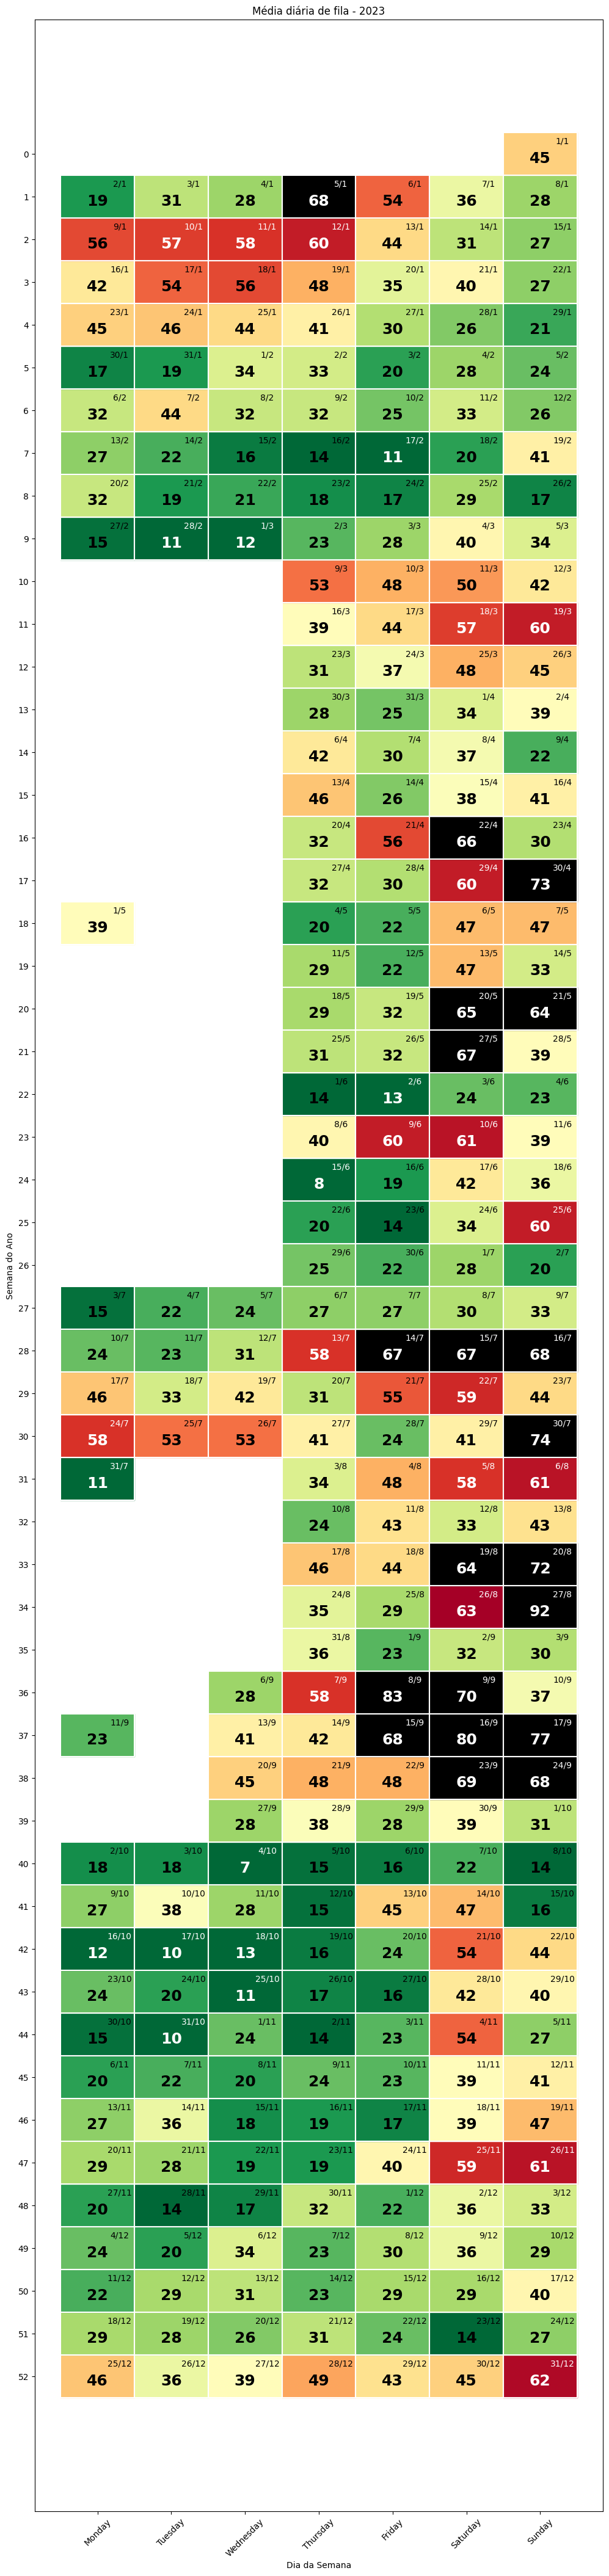

In [15]:
gera_calendario(espera_media_2023, p5, p90, p95, "Média diária de fila - 2023")

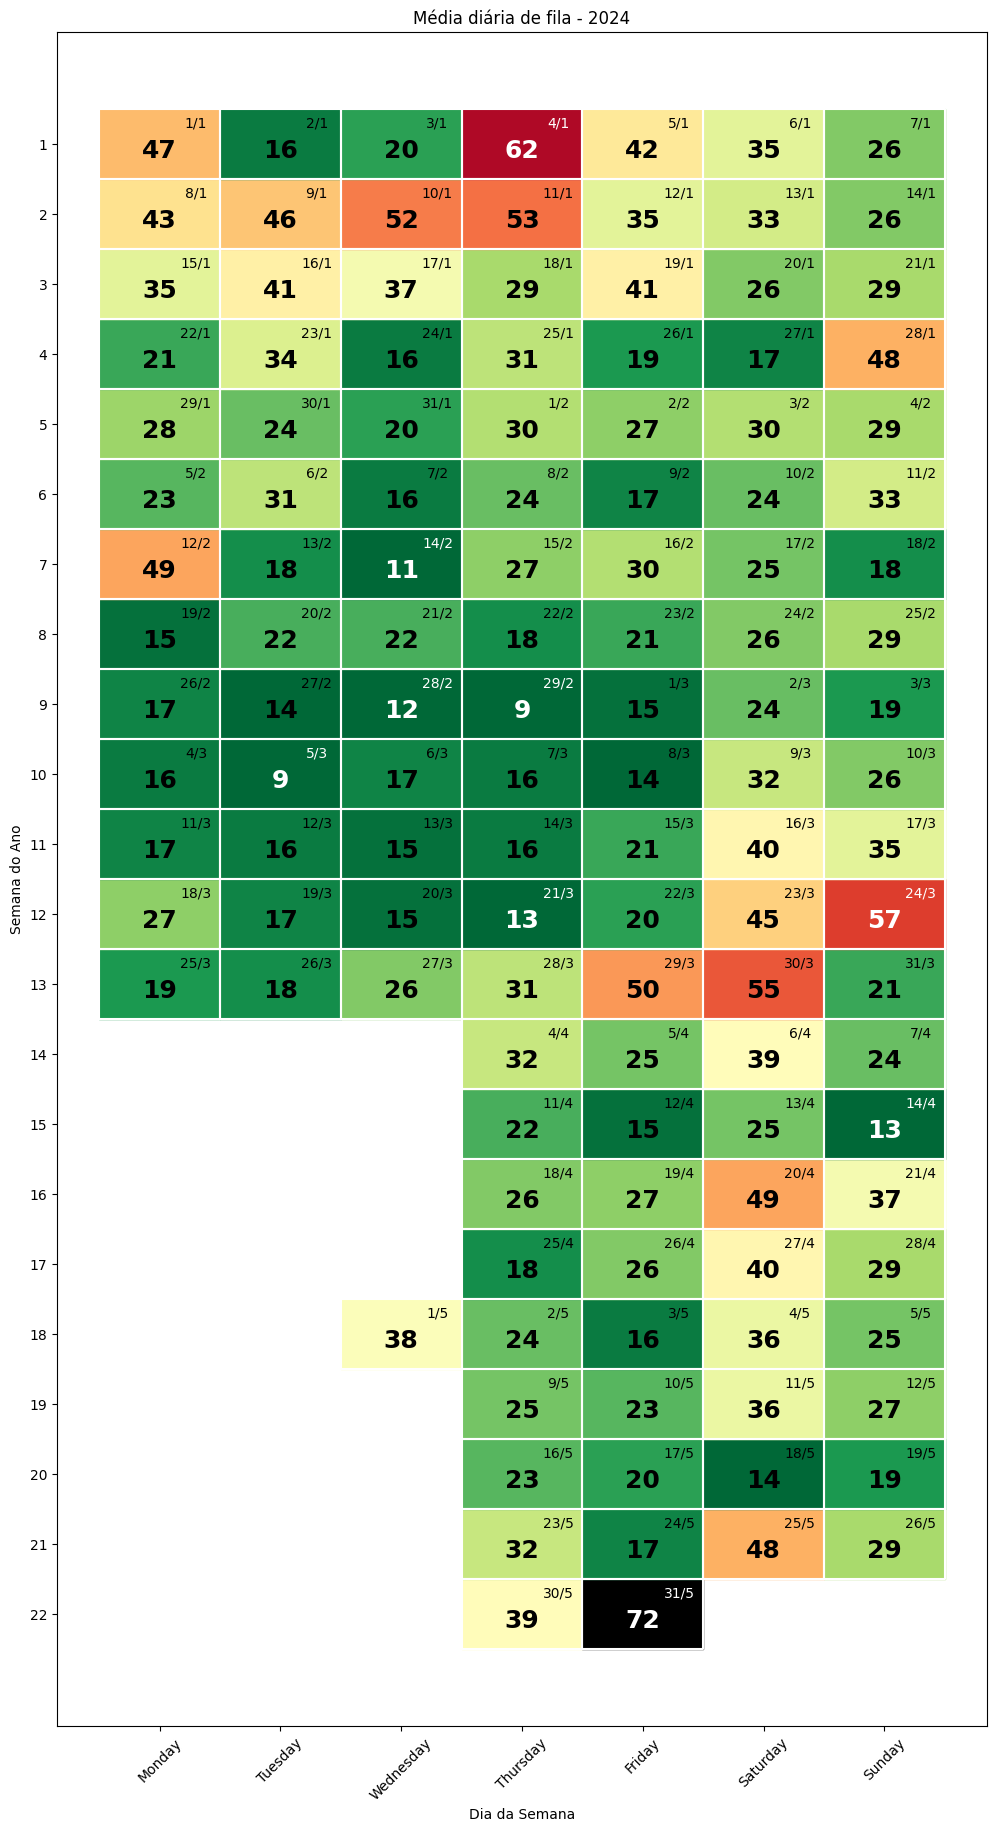

In [16]:
gera_calendario(espera_media_2024, p5, p90, p95, "Média diária de fila - 2024")

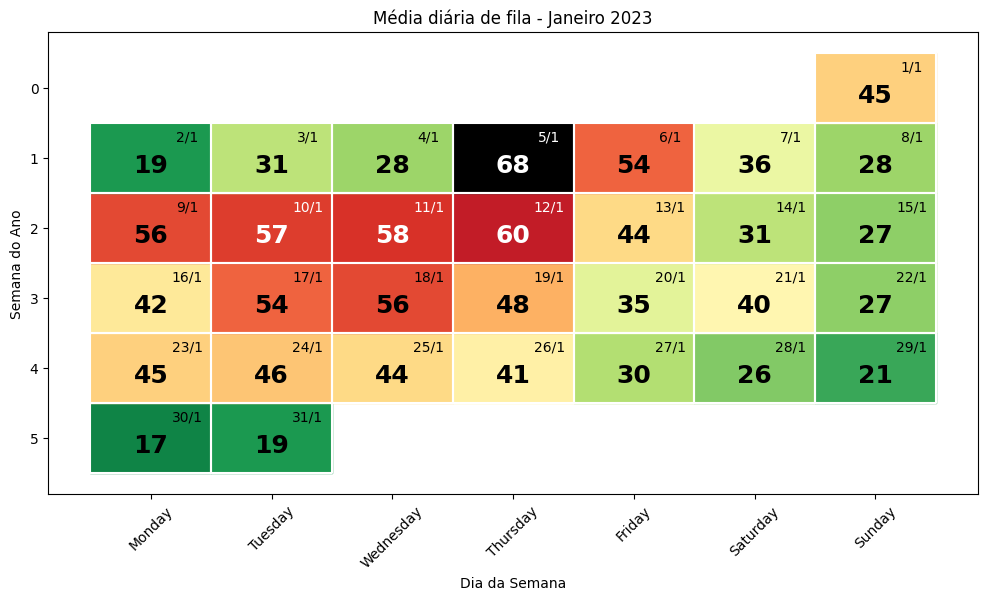

In [17]:
gera_calendario(espera_media_2023_janeiro, p5, p90, p95, "Média diária de fila - Janeiro 2023")

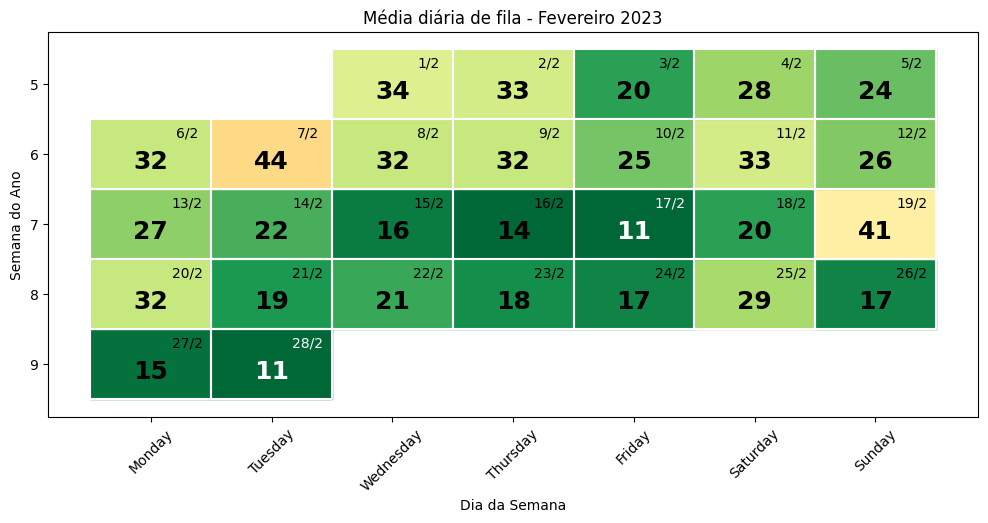

In [18]:
gera_calendario(espera_media_2023_fevereiro, p5, p90, p95, "Média diária de fila - Fevereiro 2023")

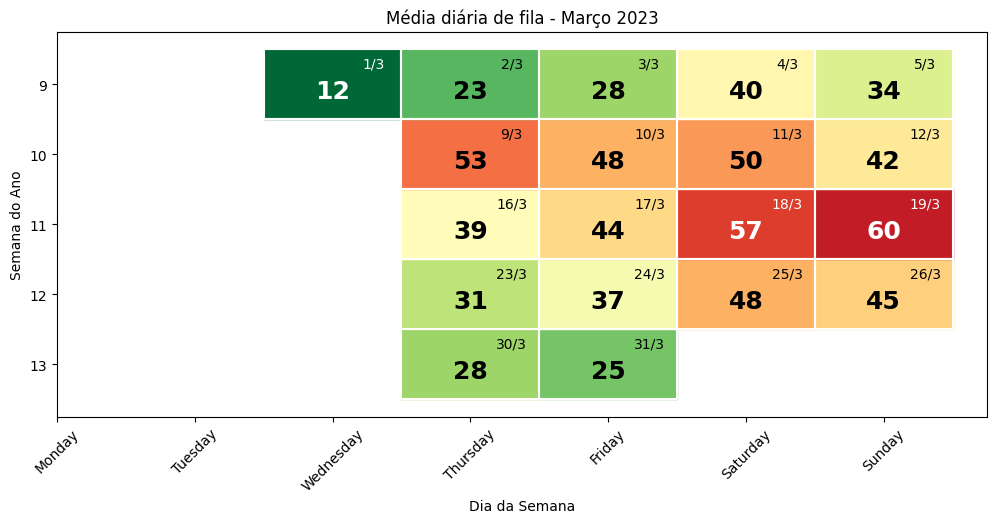

In [19]:
gera_calendario(espera_media_2023_marco, p5, p90, p95, "Média diária de fila - Março 2023")

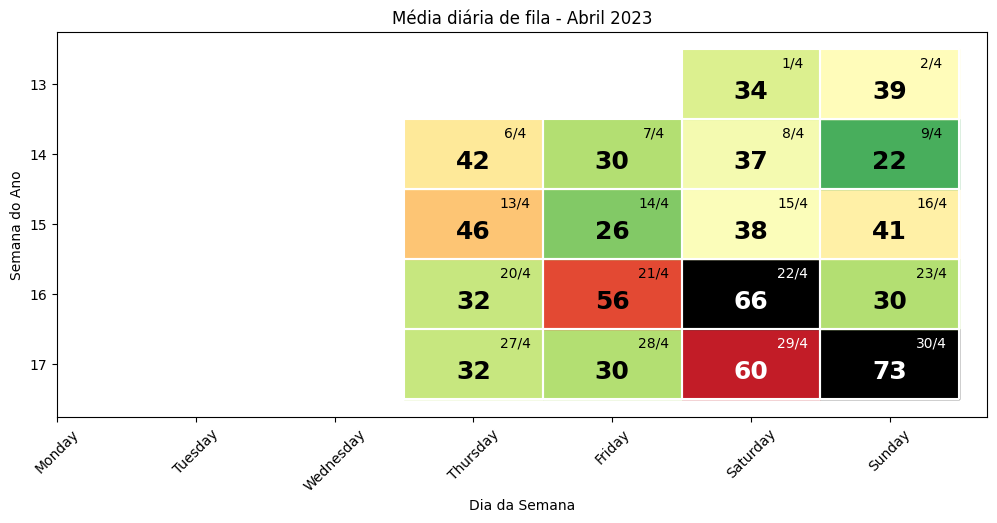

In [20]:
gera_calendario(espera_media_2023_abril, p5, p90, p95, "Média diária de fila - Abril 2023")

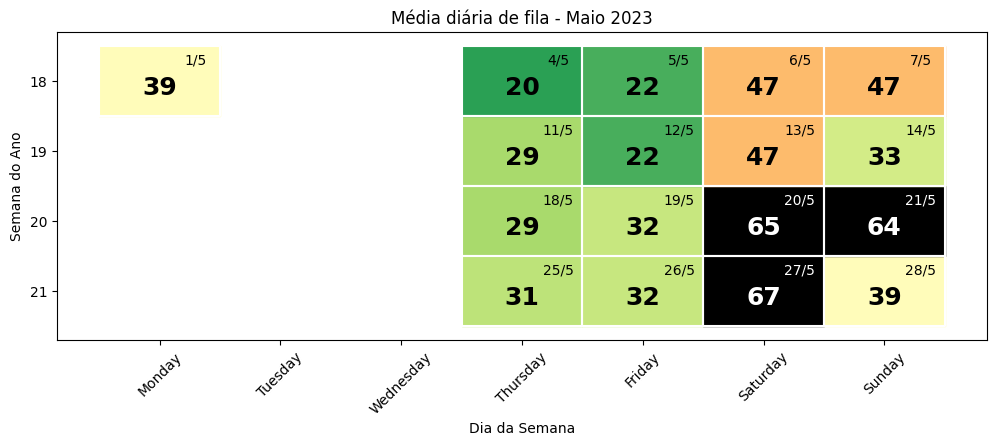

In [21]:
gera_calendario(espera_media_2023_maio, p5, p90, p95, "Média diária de fila - Maio 2023")

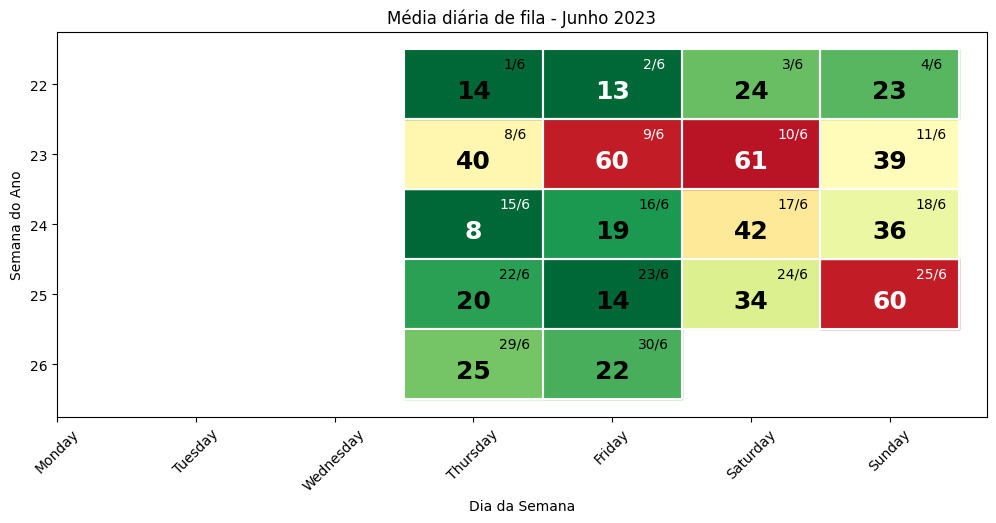

In [22]:
gera_calendario(espera_media_2023_junho, p5, p90, p95, "Média diária de fila - Junho 2023")

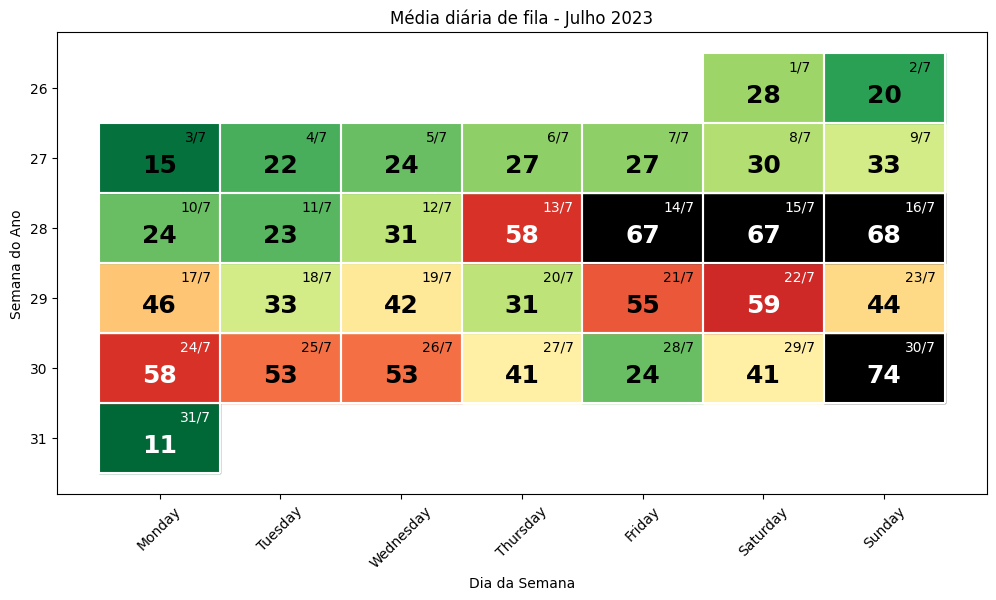

In [23]:
gera_calendario(espera_media_2023_julho, p5, p90, p95, "Média diária de fila - Julho 2023")

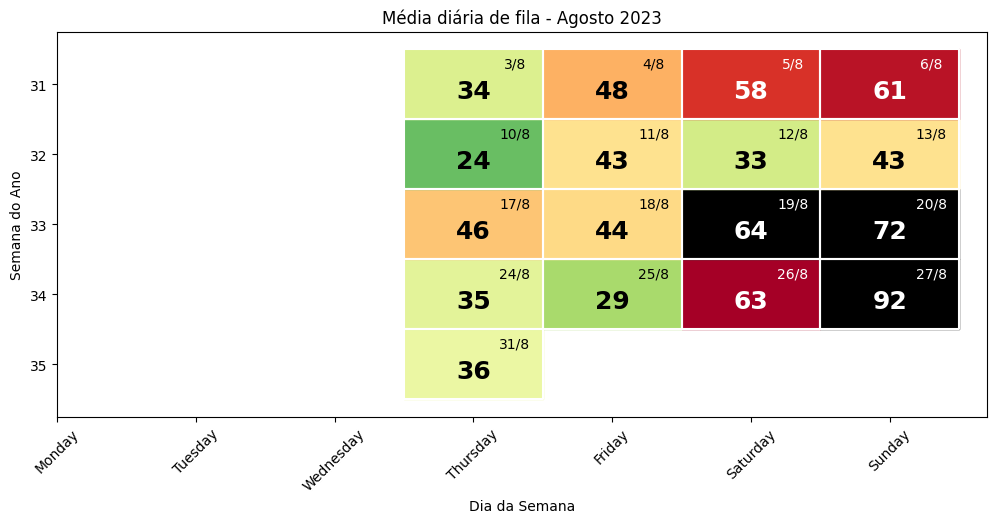

In [24]:
gera_calendario(espera_media_2023_agosto, p5, p90, p95, "Média diária de fila - Agosto 2023")

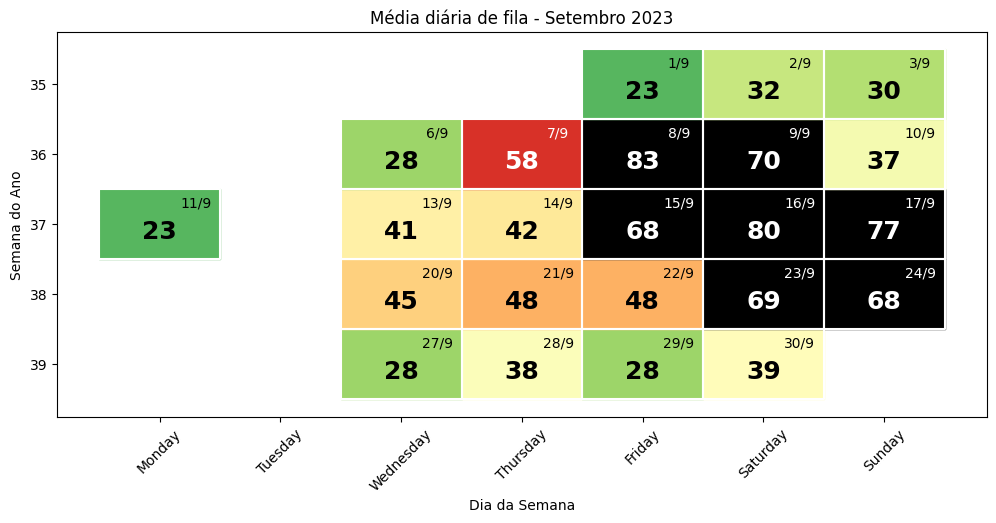

In [25]:
gera_calendario(espera_media_2023_setembro, p5, p90, p95, "Média diária de fila - Setembro 2023")

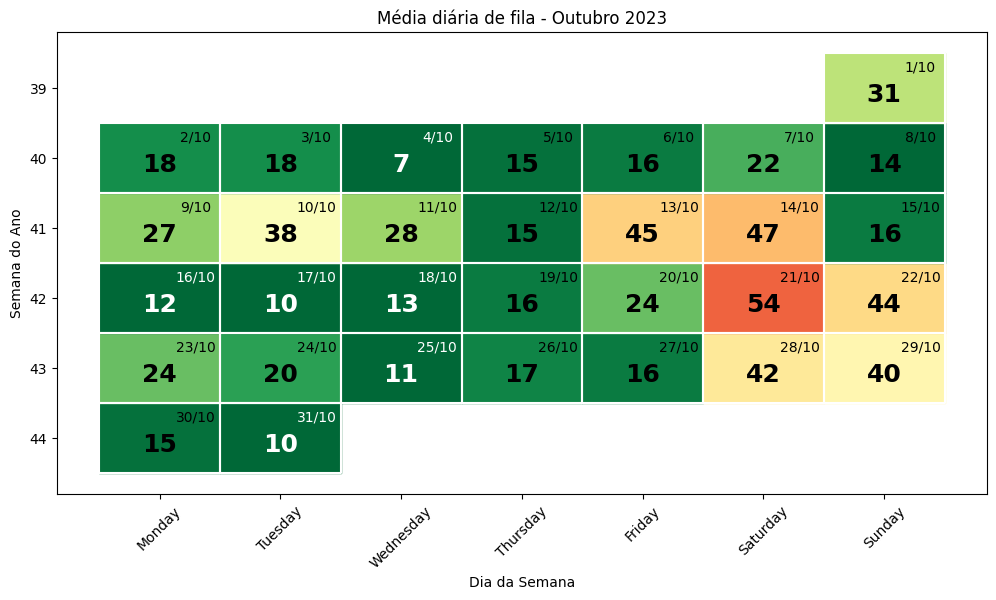

In [26]:
gera_calendario(espera_media_2023_outubro, p5, p90, p95, "Média diária de fila - Outubro 2023")

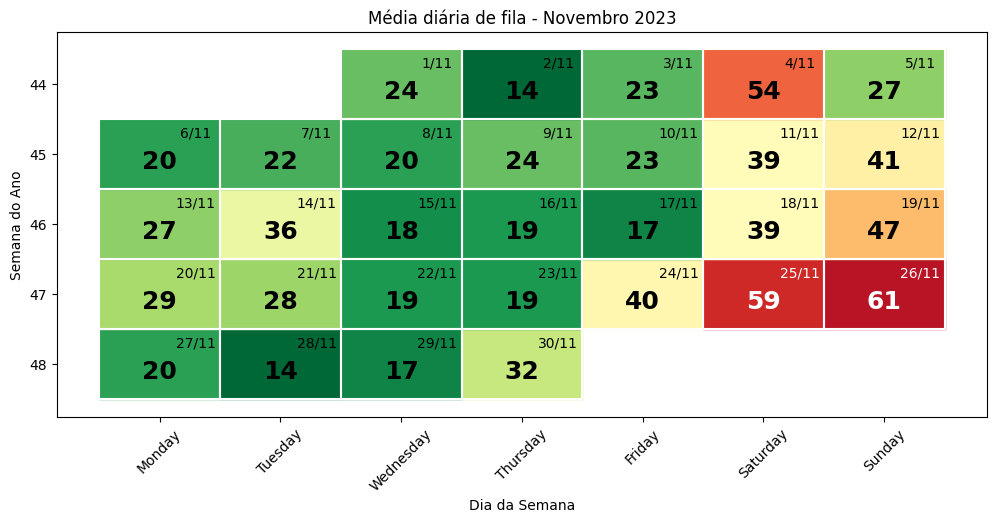

In [27]:
gera_calendario(espera_media_2023_novembro, p5, p90, p95, "Média diária de fila - Novembro 2023")

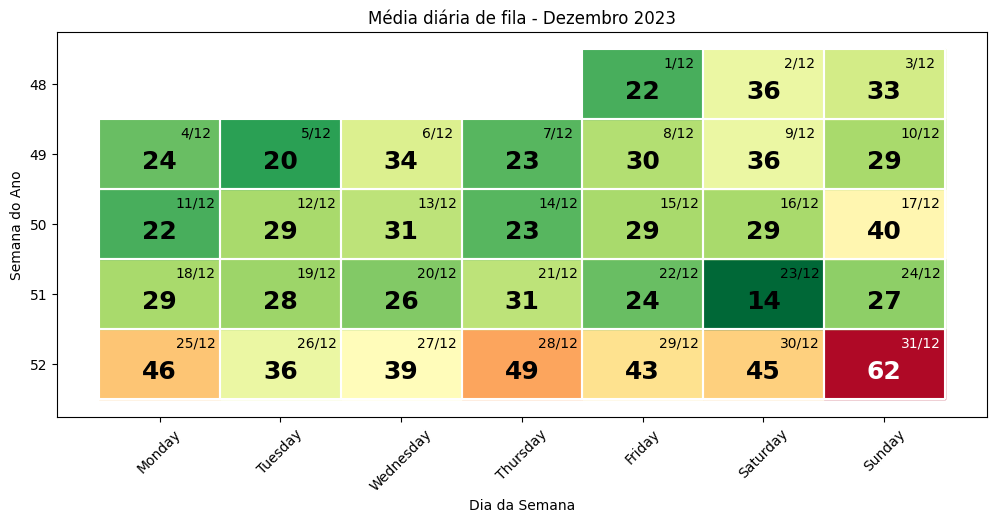

In [28]:
gera_calendario(espera_media_2023_dezembro, p5, p90, p95, "Média diária de fila - Dezembro 2023") 

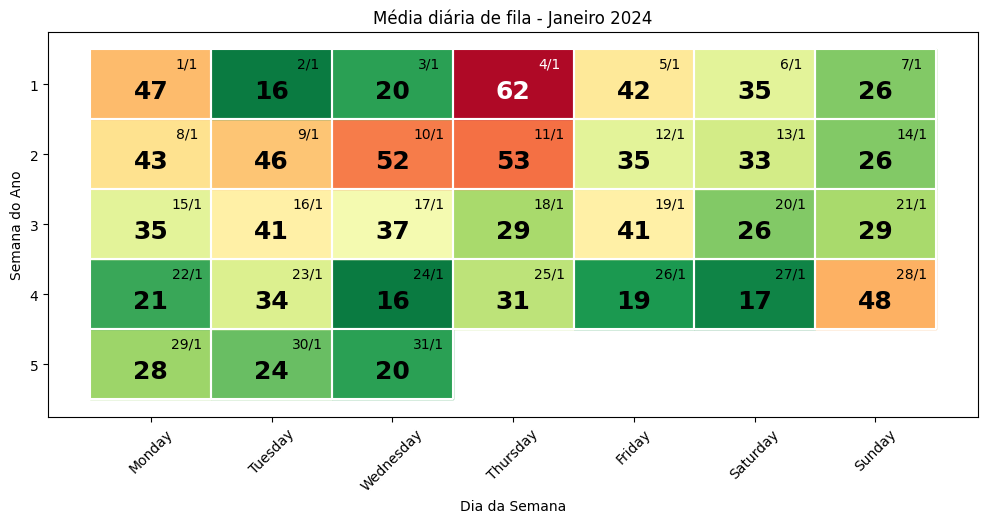

In [29]:
gera_calendario(espera_media_2024_janeiro, p5, p90, p95, "Média diária de fila - Janeiro 2024")

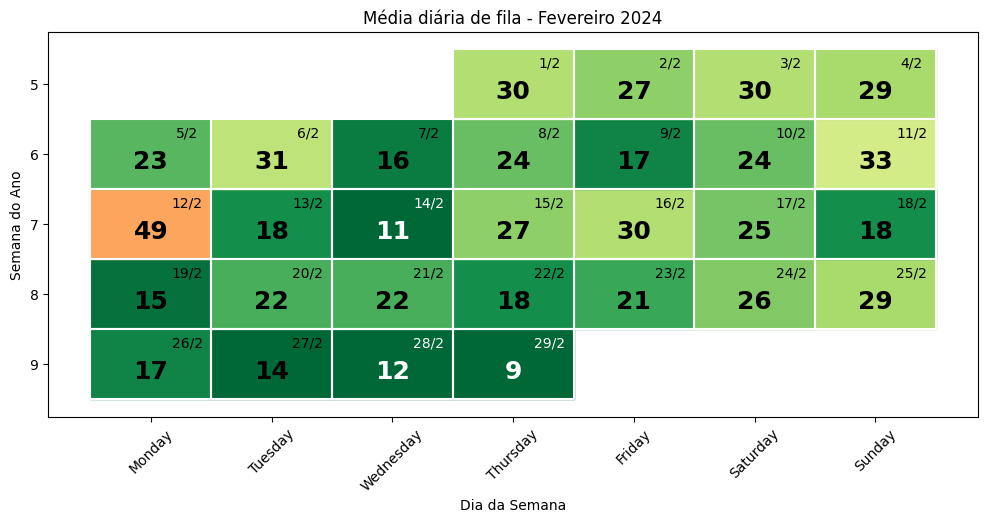

In [30]:
gera_calendario(espera_media_2024_fevereiro, p5, p90, p95, "Média diária de fila - Fevereiro 2024")

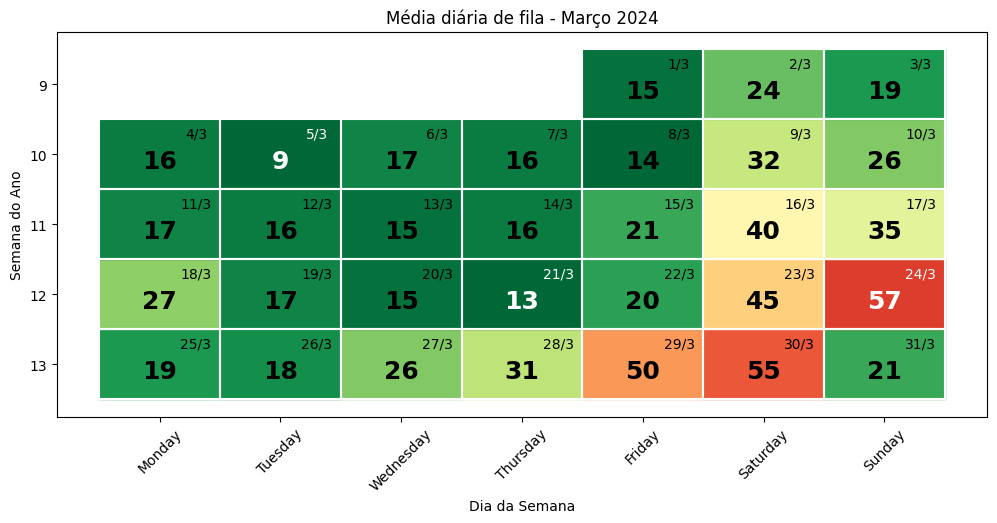

In [31]:
gera_calendario(espera_media_2024_marco, p5, p90, p95, "Média diária de fila - Março 2024")

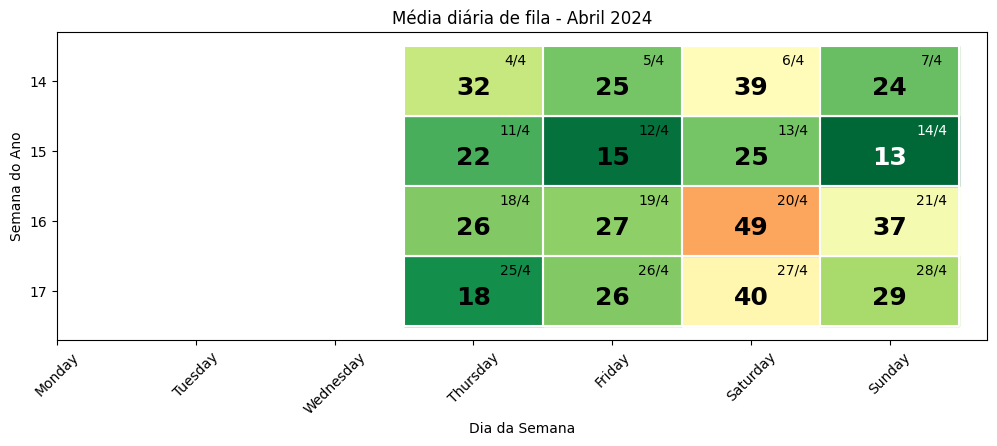

In [32]:
gera_calendario(espera_media_2024_abril, p5, p90, p95, "Média diária de fila - Abril 2024")

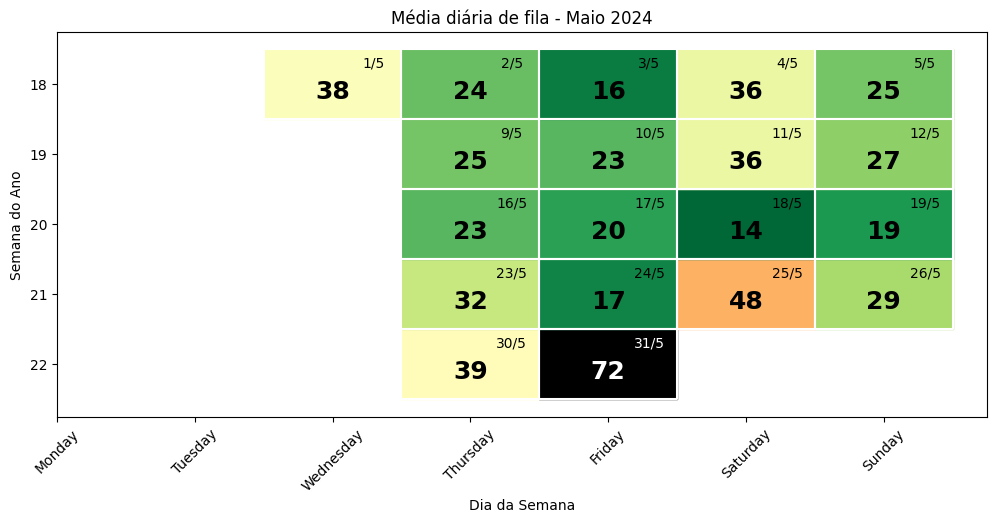

In [33]:
gera_calendario(espera_media_2024_maio, p5, p90, p95, "Média diária de fila - Maio 2024")

In [34]:
def gera_grafico_barras(espera, p5, p90, p95, p100, titulo):
    def custom_color_map(value):
        if pd.isna(value):
            return 'white'  # para datas sem dados
        else:
            norm_value = (value - p5) / (p100 - p5)
            norm_value = max(0, min(norm_value, 1))
            return plt.cm.RdYlGn_r(norm_value)
    
    # Preparando as datas para que todas apareçam no gráfico
    dates = pd.date_range(start=espera_media['date'].min(), end=espera['date'].max())
    espera_full = espera.set_index('date').reindex(dates).reset_index().rename(columns={'index': 'date'})
    
    # Criando o gráfico
    fig, ax = plt.subplots(figsize=(25, 5))
    bars = ax.bar(espera_full['date'], espera_full['wait_time'], color=[custom_color_map(x) for x in espera_full['wait_time']])
    
    # Configurações do eixo x
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Configura a localização dos ticks para cada mês
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato dos ticks
    plt.xticks(rotation=90)  # Rotaciona os ticks para melhor visualização
    
    # Adicionando rótulos e título
    plt.xlabel('Data')
    plt.ylabel('Tempo de Espera Médio')
    plt.title(titulo)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


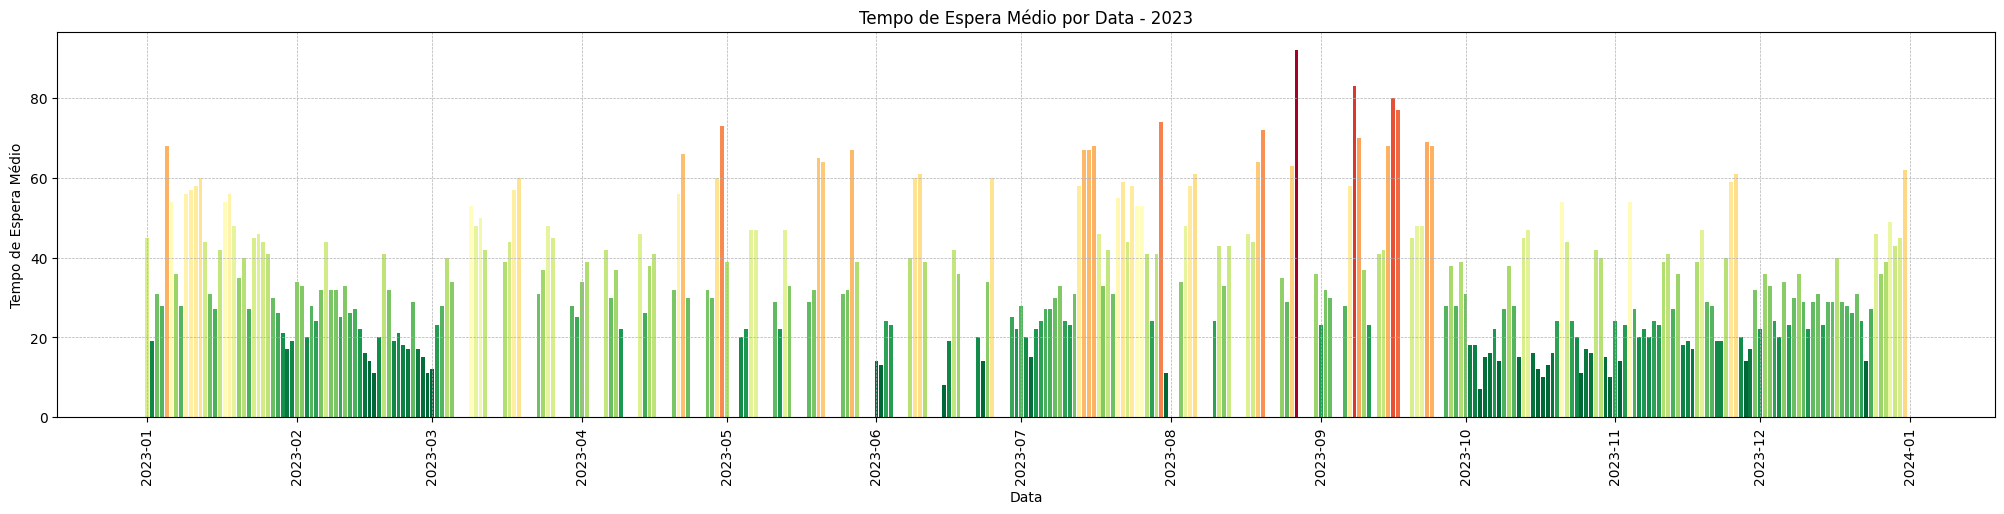

In [35]:
gera_grafico_barras(espera_media_2023, p5, p90, p95, p100, 'Tempo de Espera Médio por Data - 2023')

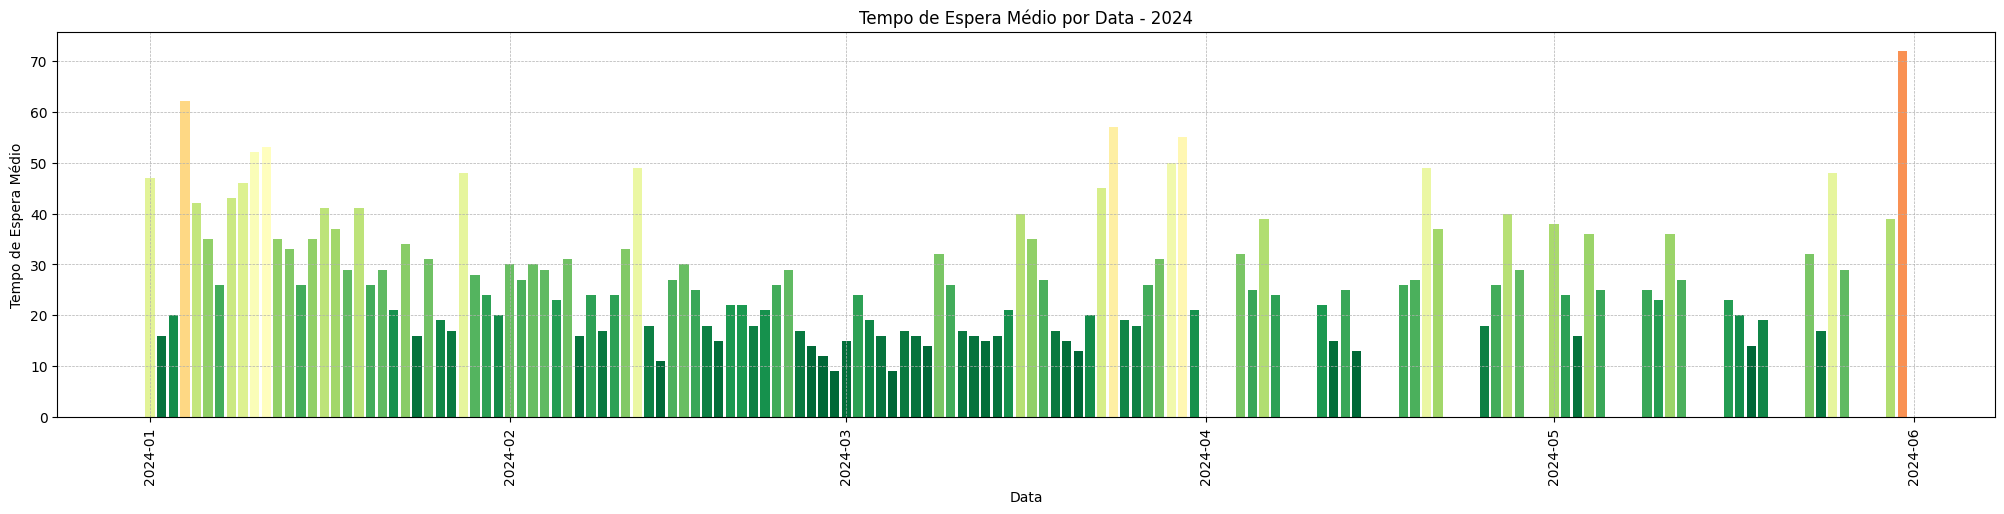

In [36]:
gera_grafico_barras(espera_media_2024, p5, p90, p95, p100, 'Tempo de Espera Médio por Data - 2024')

  day_of_week  wait_time
1      Monday      27.88
5     Tuesday      26.90
6   Wednesday      27.20
4    Thursday      30.69
0      Friday      31.46
2    Saturday      41.21
3      Sunday      38.01


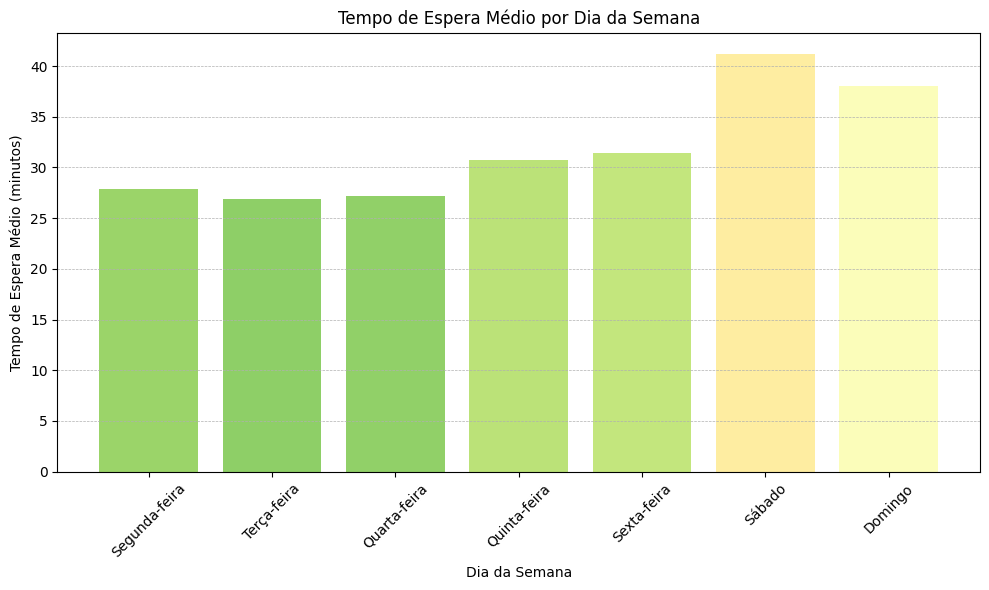

In [37]:
# Verificar se a coluna 'day_of_week' existe e criá-la se necessário
if 'day_of_week' not in espera_media.columns:
    espera_media['day_of_week'] = espera_media['date'].dt.day_name()

# Agrupar por dia da semana
agrupado_por_dia_da_semana = espera_media.groupby('day_of_week')['wait_time'].mean().reset_index()

# Ordenar os resultados pelos dias da semana em ordem cronológica
dias_da_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
agrupado_por_dia_da_semana['day_of_week'] = pd.Categorical(agrupado_por_dia_da_semana['day_of_week'], categories=dias_da_semana, ordered=True)
agrupado_por_dia_da_semana = agrupado_por_dia_da_semana.sort_values('day_of_week')

# Arredondar os tempos de espera médios para facilitar a leitura
agrupado_por_dia_da_semana['wait_time'] = agrupado_por_dia_da_semana['wait_time'].round(2)

# Mostrar o resultado
print(agrupado_por_dia_da_semana)


# Cálculo dos percentis para a escala de cores
p0_w = np.percentile(agrupado_por_dia_da_semana['wait_time'].dropna(), 0)
p100_w = np.percentile(agrupado_por_dia_da_semana['wait_time'].dropna(), 100)

def custom_color_map(value, p0_w, p100_w):
    if pd.isna(value):
        return 'white'  # para dias sem dados
    else:
        norm_value = (value - p0_w) / (p100_w - p0_w)
        norm_value = max(0, min(norm_value, 1))  # Garante que o valor esteja entre 0 e 1
        return plt.cm.RdYlGn_r(norm_value)

# Dicionário para traduzir os dias da semana para o português
dias_da_semana_pt = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Aplica a tradução para os dias da semana
agrupado_por_dia_da_semana['day_of_week_pt'] = agrupado_por_dia_da_semana['day_of_week'].map(dias_da_semana_pt)

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(10, 6))
colors = [custom_color_map(x, p5, p95) for x in agrupado_por_dia_da_semana['wait_time']]
bars = ax.bar(agrupado_por_dia_da_semana['day_of_week_pt'], agrupado_por_dia_da_semana['wait_time'], color=colors)

# Adicionando rótulos e título
ax.set_xlabel('Dia da Semana')
ax.set_ylabel('Tempo de Espera Médio (minutos)')
ax.set_title('Tempo de Espera Médio por Dia da Semana')

# Melhorando a apresentação do eixo X
plt.xticks(rotation=45)

# Adicionando uma grade para facilitar a visualização
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
 
# Exibir o gráfico
plt.tight_layout()
plt.show()

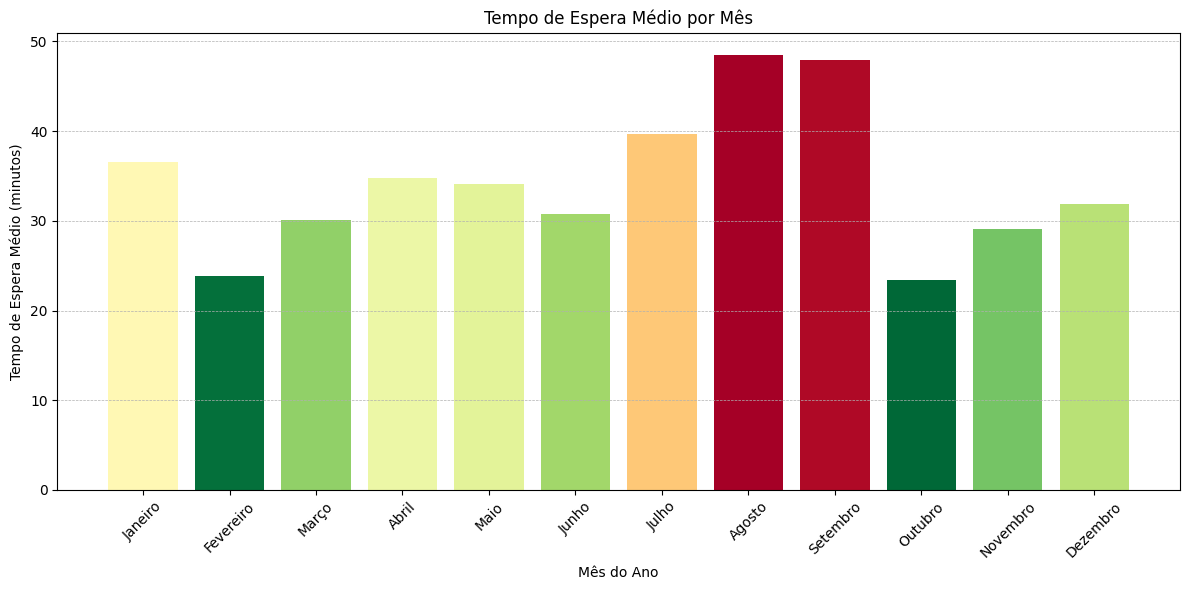

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Verificar se a coluna 'month' existe e criá-la se necessário
if 'month' not in espera_media.columns:
    espera_media['month'] = espera_media['date'].dt.month

# Agrupar por mês
agrupado_por_mes = espera_media.groupby('month')['wait_time'].mean().reset_index()

# Ordenar os resultados pelos meses em ordem cronológica
meses_do_ano = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
agrupado_por_mes['month_name'] = pd.Categorical(pd.to_datetime(agrupado_por_mes['month'], format='%m').dt.month_name(), categories=meses_do_ano, ordered=True)
agrupado_por_mes = agrupado_por_mes.sort_values('month_name')

# Arredondar os tempos de espera médios para facilitar a leitura
agrupado_por_mes['wait_time'] = agrupado_por_mes['wait_time'].round(2)

# Cálculo dos percentis para a escala de cores
p0_w = np.percentile(agrupado_por_mes['wait_time'].dropna(), 0)
p100_w = np.percentile(agrupado_por_mes['wait_time'].dropna(), 100)

# Função de mapeamento de cores
def custom_color_map(value, p0_w, p100_w):
    if pd.isna(value):
        return 'white'  # para meses sem dados
    else:
        norm_value = (value - p0_w) / (p100_w - p0_w)
        norm_value = max(0, min(norm_value, 1))  # Garante que o valor esteja entre 0 e 1
        return plt.cm.RdYlGn_r(norm_value)

# Dicionário para traduzir os meses para o português
meses_do_ano_pt = {
    'January': 'Janeiro', 'February': 'Fevereiro', 'March': 'Março', 'April': 'Abril',
    'May': 'Maio', 'June': 'Junho', 'July': 'Julho', 'August': 'Agosto',
    'September': 'Setembro', 'October': 'Outubro', 'November': 'Novembro', 'December': 'Dezembro'
}

# Aplica a tradução para os meses
agrupado_por_mes['month_name_pt'] = agrupado_por_mes['month_name'].map(meses_do_ano_pt)

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(12, 6))
colors = [custom_color_map(x, p0_w, p100_w) for x in agrupado_por_mes['wait_time']]
bars = ax.bar(agrupado_por_mes['month_name_pt'], agrupado_por_mes['wait_time'], color=colors)

# Adicionando rótulos e título
ax.set_xlabel('Mês do Ano')
ax.set_ylabel('Tempo de Espera Médio (minutos)')
ax.set_title('Tempo de Espera Médio por Mês')

# Melhorando a apresentação do eixo X
plt.xticks(rotation=45)

# Adicionando uma grade para facilitar a visualização
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [39]:
espera_media['sale'] = espera_media['sale'].fillna('Sem promoção')
espera_media['holiday'] = espera_media['holiday'].fillna('Dia comum')
espera_media['holiday_season'] = espera_media['holiday_season'].fillna('Dia comum')
espera_media['season'] = espera_media['season'].fillna('Dia comum')


# Agrupamento por 'sale'
agrupado_por_sale = espera_media.groupby('sale')['wait_time'].mean().reset_index()
agrupado_por_sale['wait_time'] = agrupado_por_sale['wait_time'].round(2)

# Agrupamento por 'holiday'
agrupado_por_holiday = espera_media.groupby('holiday')['wait_time'].mean().reset_index()
agrupado_por_holiday['wait_time'] = agrupado_por_holiday['wait_time'].round(2)

# Agrupamento por 'holiday_season'
agrupado_por_holiday_season = espera_media.groupby('holiday_season')['wait_time'].mean().reset_index()
agrupado_por_holiday_season['wait_time'] = agrupado_por_holiday_season['wait_time'].round(2)

# Agrupamento por 'season'
agrupado_por_season = espera_media.groupby('season')['wait_time'].mean().reset_index()
agrupado_por_season['wait_time'] = agrupado_por_season['wait_time'].round(2)


In [40]:
print("Agrupamento por Promoções (Sale):")
print(agrupado_por_sale)

print("\nAgrupamento por Feriados (Holiday):")
print(agrupado_por_holiday)

print("\nAgrupamento por Temporadas de Feriados (Holiday Season):")
print(agrupado_por_holiday_season)

print("\nAgrupamento por Estações (Season):")
print(agrupado_por_season)

Agrupamento por Promoções (Sale):
           sale  wait_time
0  Sem promoção      31.46
1   fathers day      45.81
2  mother's day      27.00
3   mothers day      39.12
4      smartday      51.14

Agrupamento por Feriados (Holiday):
                 holiday  wait_time
0              Dia comum      32.89
1          all souls day      14.00
2               carnival      26.80
3          childrens day      15.00
4          christmas day      46.00
5          christmas eve      27.00
6       christmas season      31.50
7         corpus christi      39.50
8                 easter      21.50
9            fathers day      43.00
10           good Friday      40.00
11      independence day      58.00
12             labor day      39.00
13           labor's day      38.00
14          mother's day      27.00
15           mothers day      33.00
16              new year      54.50
17              new_year      45.00
18     parks anniversary      49.00
19  proclamation of rep.      18.00
20         

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plot_custom_bar_chart(data, category, title):
    # Cálculo dos percentis para a escala de cores
    p0_w = np.percentile(data['wait_time'].dropna(), 0)
    p100_w = np.percentile(data['wait_time'].dropna(), 100)

    # Função de mapeamento de cores
    def custom_color_map(value, p0_w, p100_w):
        if pd.isna(value):
            return 'white'  # para categorias sem dados
        else:
            norm_value = (value - p0_w) / (p100_w - p0_w)
            norm_value = max(0, min(norm_value, 1))  # Garante que o valor esteja entre 0 e 1
            return plt.cm.RdYlGn_r(norm_value)  # Escala de vermelho a verde invertido

    # Configurações do gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = [custom_color_map(x, p0_w, p100_w) for x in data['wait_time']]
    bars = ax.bar(data[category], data['wait_time'], color=colors)

    # Adicionando rótulos e título
    ax.set_xlabel(category)
    ax.set_ylabel('Tempo de Espera Médio (minutos)')
    ax.set_title(title)

    # Melhorando a apresentação do eixo X
    plt.xticks(rotation=45)

    # Adicionando uma grade para facilitar a visualização
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

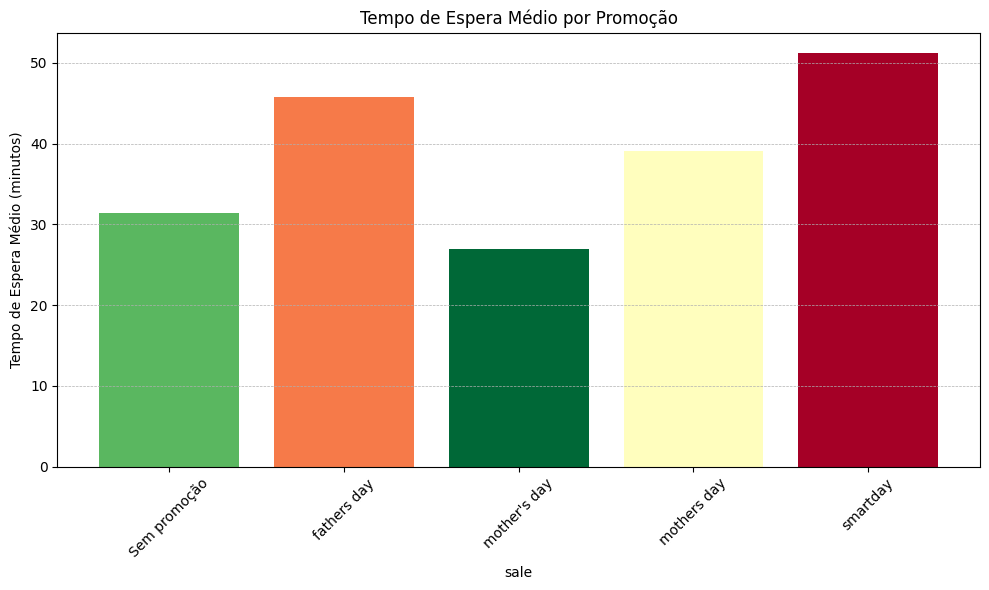

In [42]:
plot_custom_bar_chart(agrupado_por_sale, 'sale', 'Tempo de Espera Médio por Promoção')

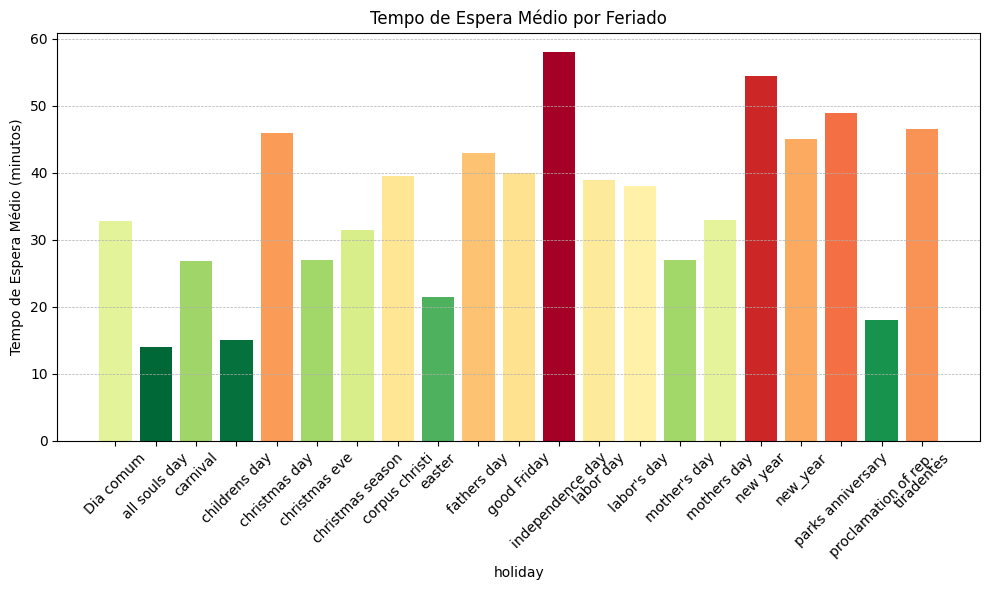

In [43]:
plot_custom_bar_chart(agrupado_por_holiday, 'holiday', 'Tempo de Espera Médio por Feriado')

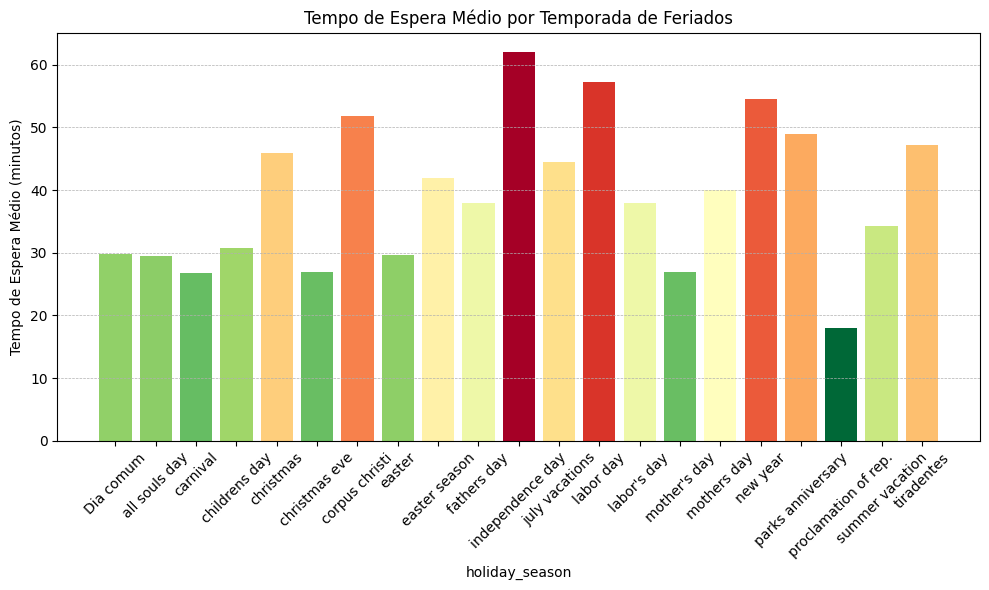

In [44]:
plot_custom_bar_chart(agrupado_por_holiday_season, 'holiday_season', 'Tempo de Espera Médio por Temporada de Feriados')

In [45]:
# Verificar a estrutura do dataframe
print(espera_media.dtypes)

# Listar todas as colunas para garantir que estamos tratando todas corretamente
print(espera_media.columns)


date                 datetime64[ns]
wait_time                   float64
year                          int64
month                         int64
day                           int64
day_of_the_week              object
park_open                    object
park_opening_time            object
park_closing_time            object
sale                         object
holiday                      object
holiday_season               object
season                       object
HotWheels 1130               object
HotWheels 1330               object
HotWheels 1530               object
HotWheels 1730               object
Acqua 1400                   object
Acqua 1500                   object
Madagascar 1500              object
Madagascar 1600              object
Madagascar 1700              object
Sonho 1800                   object
Excalibur 1200               object
Excalibur 1430               object
Excalibur 1700               object
Shrek 1900                   object
Trolls 1900                 

In [46]:
# Supondo que 'espera_media' é o seu dataframe e 'y' é a coluna de tempo médio de espera
X = espera_media.drop('wait_time', axis=1)  # removendo a coluna alvo

# Verificar e tratar variáveis categóricas e datetimelike
# Converter colunas datetimelike em múltiplas colunas numéricas
X['year'] = X['date'].dt.year
X['month'] = X['date'].dt.month
X['day'] = X['date'].dt.day
X['day_of_week'] = X['date'].dt.dayofweek  # Convertendo para numérico
X = X.drop('date', axis=1)  # remover a coluna original de data

# Aplicar one-hot encoding em variáveis categóricas restantes
X = pd.get_dummies(X, drop_first=True)

# Agora vamos dividir os dados e tentar o modelo novamente
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y = espera_media['wait_time']  # assegure-se que 'wait_time' é a coluna alvo correta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


RMSE: 13.939570259088352


In [47]:
print(y_pred)

[47.32094242 16.94785546 30.37329182 26.07620227 29.59342585]


In [48]:
print(X_test)

     year  month  day  day_of_week  week_of_year  day_of_the_week_monday  \
145  2023      7   15            5            28                       0   
334  2024      2   10            5             6                       0   
175  2023      8   25            4            34                       0   
369  2024      3   16            5            11                       0   
416  2024      5   25            5            21                       0   

     day_of_the_week_saturday  day_of_the_week_sunday  \
145                         1                       0   
334                         1                       0   
175                         0                       0   
369                         1                       0   
416                         1                       0   

     day_of_the_week_thursday  day_of_the_week_tuesday  ...  \
145                         0                        0  ...   
334                         0                        0  ...   
175        

In [49]:
print(y_test)

145    67.0
334    24.0
175    29.0
369    40.0
416    48.0
Name: wait_time, dtype: float64
